# Survival Analytics

#### Perform survival analysis on patients data.

In [1]:
# import libraries
import pandas as pd
from lifelines import KaplanMeierFitter

In [2]:
#import dataset
patients_df = pd.read_csv(r"D:\360digi\DS\Sharath\Survival_Analytics\handson\Datasets_Survival Analytics\Patient.csv")
patients_df.head()

,PatientID,Followup,Eventtype,Scenario
0,John,1.0,1,A
1,Jess,2.0,1,A
2,Ann,3.0,0,A
3,Mary,4.0,0,A
4,Frank,5.0,1,A


In [3]:
patients_df.describe()

,Followup,Eventtype
count,10.000000,10.000000
mean,5.420000,0.600000
std,2.993994,0.516398
min,1.000000,0.000000
25%,3.250000,0.000000
50%,5.500000,1.000000
75%,7.550000,1.000000
max,10.000000,1.000000


In [4]:
patients_df["Followup"].describe()

count    10.000000
mean      5.420000
std       2.993994
min       1.000000
25%       3.250000
50%       5.500000
75%       7.550000
max      10.000000
Name: Followup, dtype: float64

In [5]:
# Followup column refers to time
T = patients_df.Followup

In [6]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

In [7]:
# Fitting KaplanMeierFitter model on Follow up and Events of patients
kmf.fit(T, event_observed = patients_df.Eventtype)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 10 total observations, 4 right-censored observations>

<AxesSubplot:xlabel='timeline'>

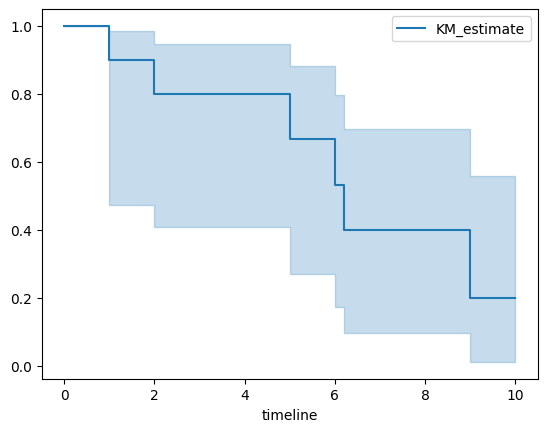

In [8]:
# Time-line estimations plot 
kmf.plot()

In [9]:
# Group based on Scenario column
patients_df.Scenario.value_counts()

A    10
Name: Scenario, dtype: int64

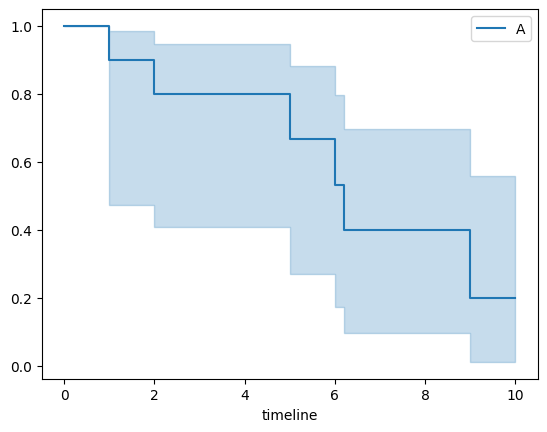

In [10]:
# Applying KaplanMeierFitter model on Foolow up and Events for the group "A"
kmf.fit(T[patients_df.Scenario=="A"], patients_df.Eventtype[patients_df.Scenario=="A"], label='A')
ax = kmf.plot()